In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns

import time

import MySQLdb
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
path = "/home/jingfei/data/MAG/"

df_conference = pd.read_csv(path+"df_conference.csv")
#df_paper = pd.read_csv(path+"df_paper.csv")
df_a2p = pd.read_csv(path+"df_a2p.csv", low_memory=False)
df_aff = pd.read_csv(path+"df_aff.csv")
df_author = pd.read_csv(path+"df_author.csv")

df_relationship = pd.read_csv(path+"df_relationship.csv")

df_paper = pd.read_csv(path+"df_paper_withcountry.csv")

# Most Cited Author in China

In [9]:
df_paper.head()

,paper_id,title,publish_year,aff_name,country,con_id,con_abbr
0,77BDE3C7,Consistent nonlinear dynamics: identifying mod...,2004,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD
1,7F9822E0,"Parameter space analysis, pattern sensitivity ...",2001,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD
2,78B15C87,Highly nonlinear solitary waves in heterogeneo...,2009,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD
3,7B3FF2C2,Active propagation and cut-off for low TM mode...,2000,national autonomous university of mexico,Mexico,456CDDD6,ISPD
4,79D26C2D,Evolution of two-dimensional standing and trav...,2004,national autonomous university of mexico,Mexico,456CDDD6,ISPD


In [8]:
df_citation = DataFrame(df_relationship.groupby(['src_id']).size())
df_citation.columns = ['citation']

In [10]:
df_paper= pd.merge(df_paper, df_citation, left_on='paper_id', right_index=True, how='left')

df_paper['citation'] = df_paper['citation'].fillna(0)

In [19]:
df_paper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907177 entries, 0 to 907176
Data columns (total 8 columns):
paper_id        907177 non-null object
title           907177 non-null object
publish_year    907177 non-null int64
aff_name        907177 non-null object
country         816523 non-null object
con_id          907177 non-null object
con_abbr        907177 non-null object
citation        907177 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 55.4+ MB


In [22]:
df_tmp = pd.merge(df_a2p, df_paper, left_on = 'paper_id', right_on='paper_id')
df_tmp = df_tmp[['author_id', 'paper_id', 'publish_year', 'affiliation_id', 'seq_number', 'citation']]

In [34]:
df_tmp2 = df_tmp.groupby(['author_id'])[['citation']].sum()#.sort_values(by='citation', ascending =False)

In [37]:
df_tmp2.head()

,citation
author_id,
000008CF,2.0
00004254,0.0
00005169,32.0
00007F5E,5.0
00008A3A,0.0


In [39]:
df_tmp3 = pd.merge(df_author, df_a2p.drop_duplicates(['author_id']), left_on='author_id', right_on='author_id')
df_tmp3 = df_tmp3[['author_id', 'author_name', 'affiliation_id']]

In [42]:
df_tmp4 = pd.merge(df_aff, pd.merge(df_tmp2,df_tmp3, left_index=True, right_on='author_id'), left_on='aff_id', right_on='affiliation_id')

In [44]:
df_tmp4 = df_tmp4[['author_id', 'author_name', 'aff_name', 'country', 'citation']]

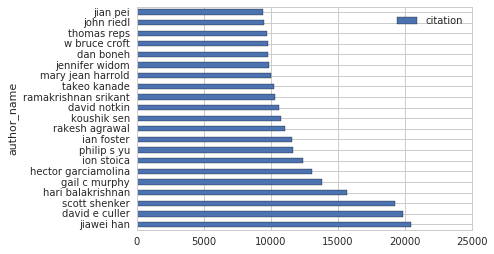

In [98]:
df_tmp4.sort_values(by='citation', ascending = False).reset_index().ix[:20].plot(kind='barh',x='author_name', y='citation')

In [118]:
df_tmp4[df_tmp4['author_name'].notnull() & df_tmp4['author_name'].str.contains("andrew ng")]

,author_id,author_name,aff_name,country,citation
23343,7DE97FDB,andrew ng,stanford university,United States,168.0
278932,7EF59944,andrew ng,washington university in st louis,United States,1.0
280742,7E9BEDE2,andrew ng,microsoft,United Kingdom,147.0


# Journal

In [119]:
df_paper

,paper_id,title,publish_year,aff_name,country,con_id,con_abbr,citation
0,77BDE3C7,Consistent nonlinear dynamics: identifying mod...,2004,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD,7.0
1,7F9822E0,"Parameter space analysis, pattern sensitivity ...",2001,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD,23.0
2,78B15C87,Highly nonlinear solitary waves in heterogeneo...,2009,mathematical institute university of oxford,United Kingdom,456CDDD6,ISPD,29.0
3,7B3FF2C2,Active propagation and cut-off for low TM mode...,2000,national autonomous university of mexico,Mexico,456CDDD6,ISPD,1.0
4,79D26C2D,Evolution of two-dimensional standing and trav...,2004,national autonomous university of mexico,Mexico,456CDDD6,ISPD,2.0
5,75DF1C3D,"Correlation length, isotropy and meta-stable s...",1997,national autonomous university of mexico,Mexico,456CDDD6,ISPD,12.0
6,7A091B92,Determining finite volume elements for the 2D ...,1992,university of california,United States,456CDDD6,ISPD,22.0
7,79105FE9,A 3D adaptive mesh refinement algorithm for mu...,1992,university of california,United States,456CDDD6,ISPD,17.0
8,7D3060B2,Efficient algorithms for the minimum shortest ...,1998,university of california,United States,456CDDD6,ISPD,25.0
9,0356901C,ECOSYSTEM DYNAMICS OF AN OZARK CAVE,2000,university of california,United States,456CDDD6,ISPD,1.0
